In [1]:
import pandas as pd 
import warnings as wr 
wr.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
df.Gender = le.fit_transform(df[['Gender']])

In [5]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [6]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Linear Regression

In [8]:
x = df.drop(['Weight'],axis=1)

In [9]:
x.shape

(8555, 2)

In [10]:
y = df['Weight']

In [11]:
y.shape

(8555,)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.7,random_state=30)

In [14]:
xtrain.shape

(5988, 2)

In [15]:
ytrain.shape

(5988,)

In [16]:
xtest.shape

(2567, 2)

In [17]:
ytest.shape

(2567,)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [20]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [21]:
y_pred = reg.predict(xtest)

In [22]:
y_pred

array([138.52330563, 197.97025394, 183.18814847, ..., 122.89361962,
       187.54864336,  82.82325662])

In [23]:
reg.score(xtest,ytest)

0.9020642536665506

In [24]:
reg.score(xtrain,ytrain)

0.8990186819901841

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mse = mean_squared_error(ytest,y_pred)   #calculating mse with testing 

In [27]:
mse

102.86603858158573

# KNN Regression

In [29]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x,y, train_size=0.7,random_state=30)

In [30]:
xtrain1.shape

(5988, 2)

In [31]:
ytrain1.shape

(5988,)

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
neighbors = KNeighborsRegressor()

In [34]:
neighbors.fit(xtrain1,ytrain1)

KNeighborsRegressor()

In [35]:
pred_nei_y = neighbors.predict(xtest1)

In [36]:
pred_nei_y

array([134.18698662, 209.0086161 , 185.4556295 , ..., 122.49267146,
       187.64335848,  92.33329428])

In [37]:
neighbors.score(xtest1,ytest1)

0.8816905747936229

In [38]:
neighbors.score(xtrain1,ytrain1)

0.918996796690608

In [39]:
nei_mse = mean_squared_error(ytest,pred_nei_y)

In [40]:
nei_mse

124.26537146516661

In [41]:
import matplotlib.pyplot as plt

In [42]:
print(xtrain.shape)
print(y_pred.shape)

(5988, 2)
(2567,)


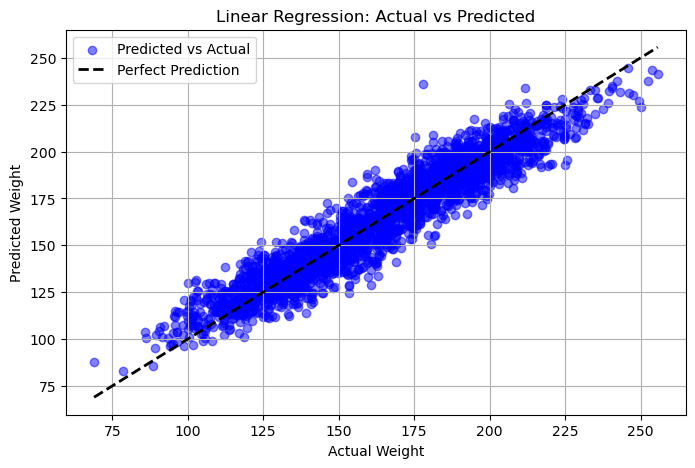

In [110]:
plt.figure(figsize=(8,5))
plt.scatter(ytest, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

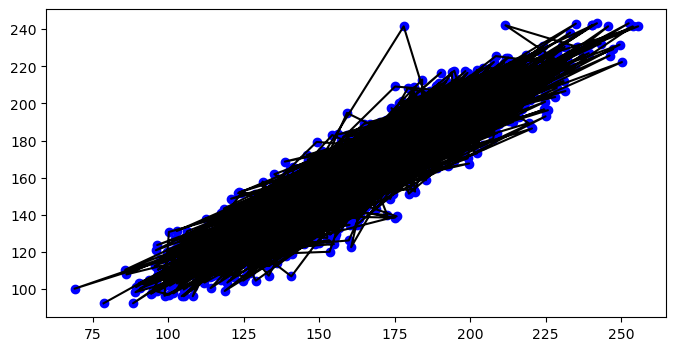

In [126]:
plt.figure(figsize=(8,4))
plt.scatter(ytest1,pred_nei_y,color='blue',marker='o')
plt.plot(ytest1,neighbors.predict(xtest1),color='black',label='best fit line')
plt.show()

